WDS BEFORE AND AFTER PANDEMIC REGRESSIONS

 0.1 Data Visualization on the Entire Dataframe

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('StudentsPerformance1.csv')

In [3]:
df

,gender,tools,level of education,mental health,test mode,score before pandemic,score after pandemic,aggregate score
0,female,Computer,bachelor's degree,normal,online,72,72,72.0
1,female,Mobile,college,normal,offline,69,90,79.5
2,female,Computer,college,normal,online,90,95,92.5
3,male,Tablet,associate's degree,stressed,online,47,57,52.0
4,male,Mobile,college,normal,online,76,78,77.0
...,...,...,...,...,...,...,...,...
995,female,Mobile,college,normal,offline,88,99,93.5
996,male,Mobile,school,stressed,online,62,55,58.5
997,female,Mobile,school,stressed,offline,59,71,65.0
998,female,Laptop,college,normal,offline,68,78,73.0


0.2 SCATTERPLOTS

In [5]:
training_data = df.iloc[ 0:499 , : ]
test_data = df.iloc[ 500:1000 , :]

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

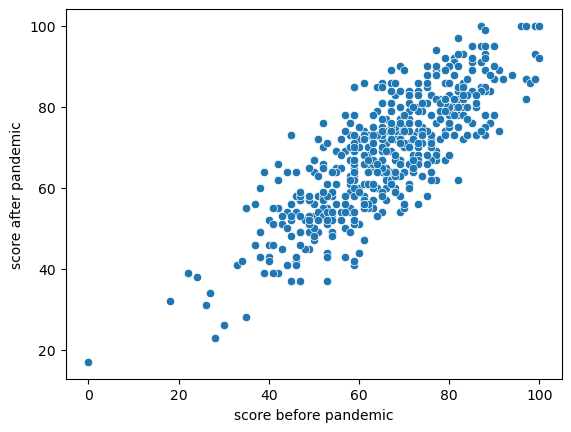

In [7]:
sns.scatterplot(x=training_data['score before pandemic'],
                y=training_data['score after pandemic'], data=training_data)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

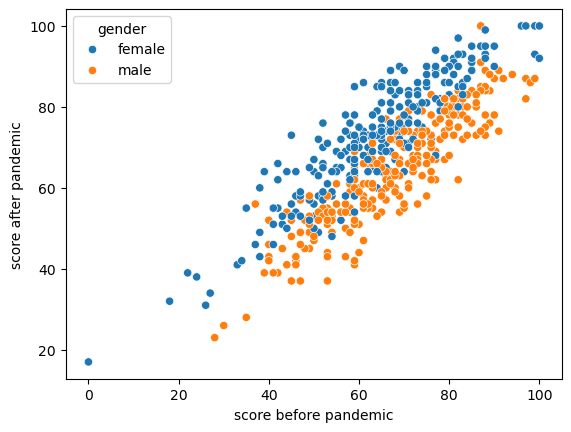

In [8]:
sns.scatterplot(x=training_data['score before pandemic'],
                y=training_data['score after pandemic'],
                hue='gender', data=training_data)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

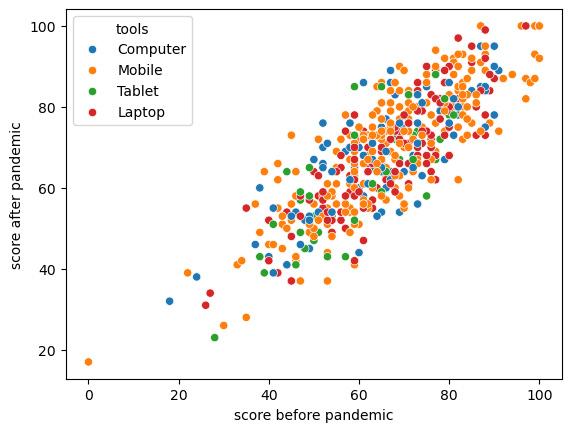

In [9]:
sns.scatterplot(x=training_data['score before pandemic'],
                y=training_data['score after pandemic'],
                hue='tools', data=training_data)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

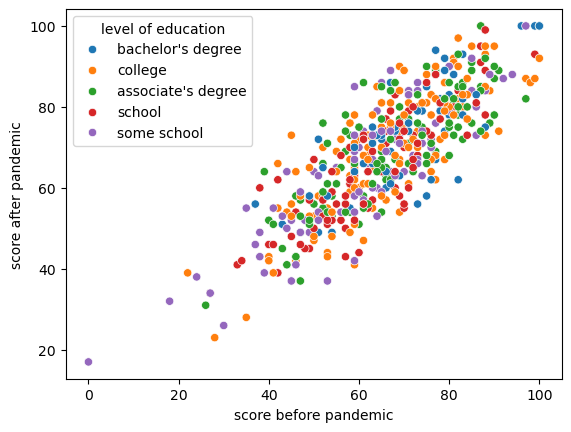

In [10]:
sns.scatterplot(x=training_data['score before pandemic'],
                y=training_data['score after pandemic'],
                hue='level of education', data=training_data)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

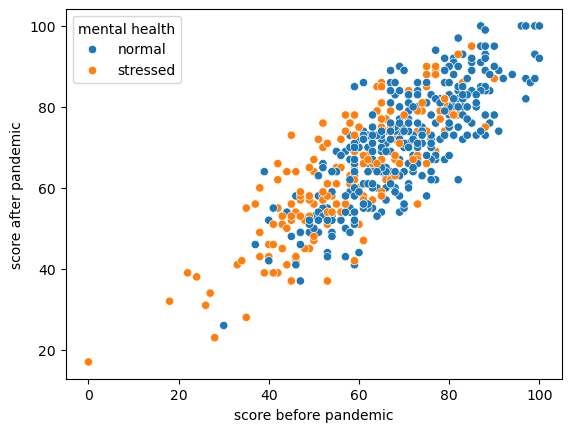

In [11]:
sns.scatterplot(x=training_data['score before pandemic'],
                y=training_data['score after pandemic'],
                hue='mental health', data=training_data)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

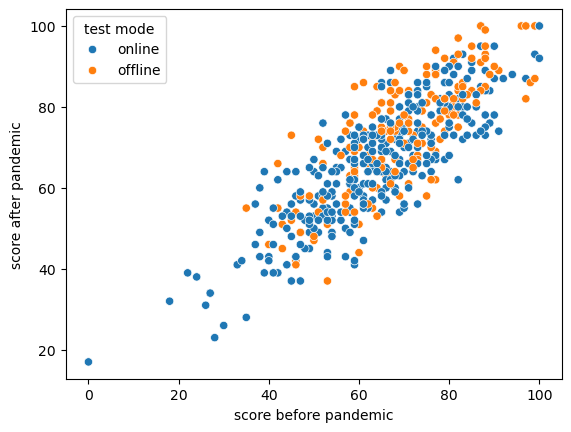

In [12]:
sns.scatterplot(x=training_data['score before pandemic'],
                y=training_data['score after pandemic'],
                hue='test mode', data=training_data)

 0.3 HISTOGRAMS

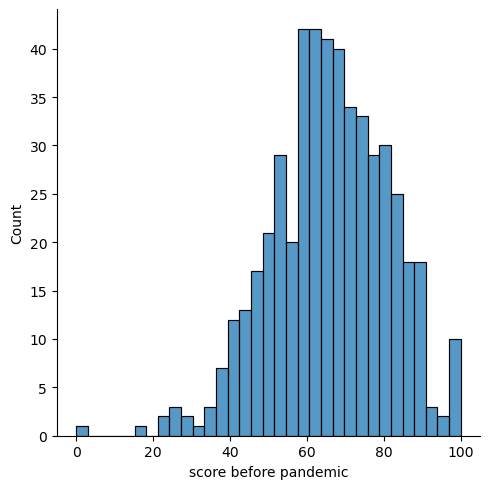

In [13]:
sns.displot(training_data['score before pandemic'], binwidth=3)

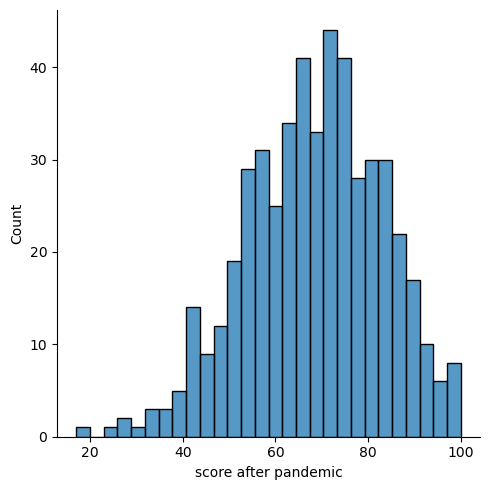

In [14]:
sns.displot(training_data['score after pandemic'], binwidth=3)

0.4 STRIPPLOT

<Axes: xlabel='gender', ylabel='score before pandemic'>

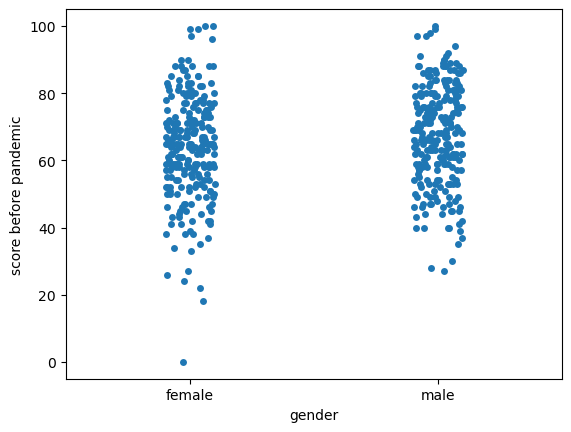

In [15]:
sns.stripplot(x='gender', y=training_data['score before pandemic'], data=training_data)

<Axes: xlabel='gender', ylabel='score after pandemic'>

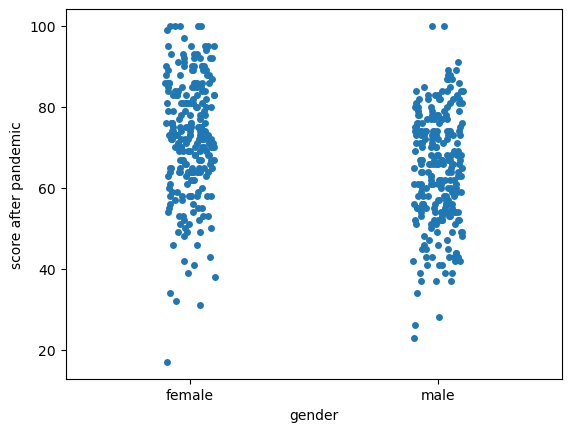

In [16]:
sns.stripplot(x='gender', y=training_data['score after pandemic'], data=training_data)

0.5 Before vs After Pandemic Linear Regression and Evaluation

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

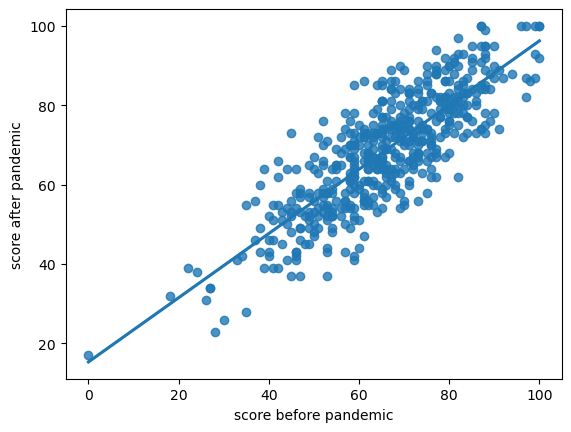

In [18]:
var1 = 'score before pandemic'
var2 = 'score after pandemic'
sns.regplot( data = training_data , x = var1, y = var2, ci=None )

In [19]:
X_train = training_data[['score before pandemic']]
y_train = training_data['score after pandemic']
lin_model = LinearRegression().fit( X_train, y_train )
m = lin_model.coef_[0]
b = lin_model.intercept_
print('m param (Coefficient): ', m)
print('b param (y-Intercept): ', b)

m param (Coefficient):  0.8088816789626947
b param (y-Intercept):  15.34478894173128


In [20]:
test_data = test_data.copy()

In [22]:
test_data['score_predicted'] = test_data[['score before pandemic']] * m + b
test_data = test_data[['score_predicted', 'score after pandemic','score before pandemic']]
test_data.head()

,score_predicted,score after pandemic,score before pandemic
500,75.202033,79,74
501,91.379667,87,94
502,66.304335,61,63
503,92.188548,89,95
504,47.700056,59,40


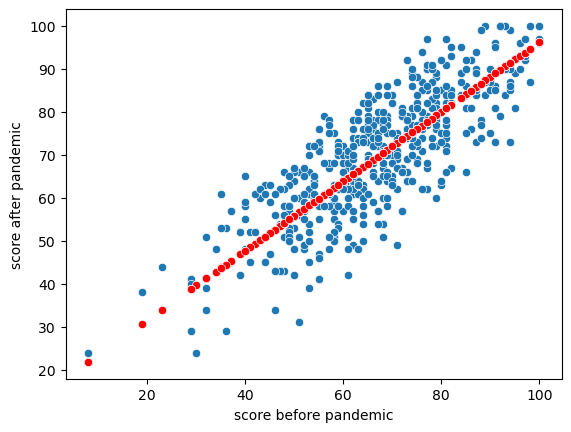

In [23]:
sns.scatterplot( data = test_data, x = 'score before pandemic', y = 'score after pandemic')
sns.scatterplot( data = test_data, x = 'score before pandemic', y ='score_predicted',color='r')
plt.show()

In [24]:
test_data['Error'] = test_data['score after pandemic'] - test_data['score_predicted']
test_data['Error_squared'] = test_data['Error'] ** 2
print('MSE for linear model: ', np.mean(test_data['Error_squared']))

MSE for linear model:  72.15070323109077


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\4147589586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Error'] = test_data['score after pandemic'] - test_data['score_predicted']
C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\4147589586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Error_squared'] = test_data['Error'] ** 2


WDS FEMALE LIN REGRESSION

0.1 Part 1 Data Visualizations

In [25]:
df1= df[df['gender'] == 'female']
pd.set_option('display.max_rows',None)
print(df1)

     gender     tools  level of education mental health test mode  \
0    female  Computer   bachelor's degree        normal    online   
1    female    Mobile             college        normal   offline   
2    female  Computer             college        normal    online   
5    female  Computer  associate's degree        normal    online   
6    female  Computer             college        normal   offline   
9    female  Computer              school      stressed    online   
12   female  Computer              school        normal    online   
14   female    Tablet             college        normal    online   
15   female    Mobile         some school        normal    online   
17   female  Computer         some school      stressed    online   
19   female    Mobile  associate's degree      stressed    online   
21   female  Computer             college      stressed   offline   
23   female    Mobile         some school        normal    online   
27   female    Mobile   bachelor's

In [26]:
df1.shape

(518, 8)

In [29]:
train_x,test_x, train_y,test_y  = train_test_split(df1['score before pandemic'],
df1['score after pandemic'],test_size=0.5,random_state= 1)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

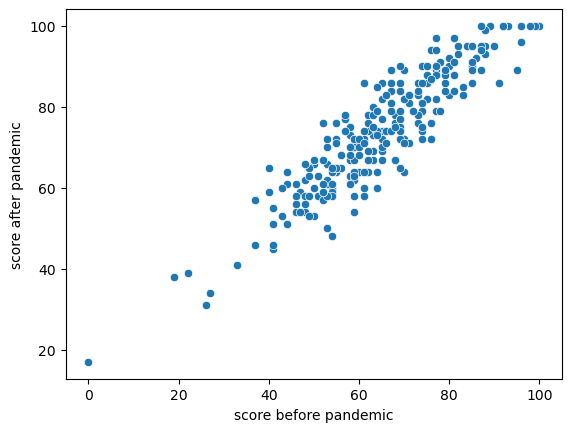

In [30]:
sns.scatterplot(x=train_x,y=train_y)

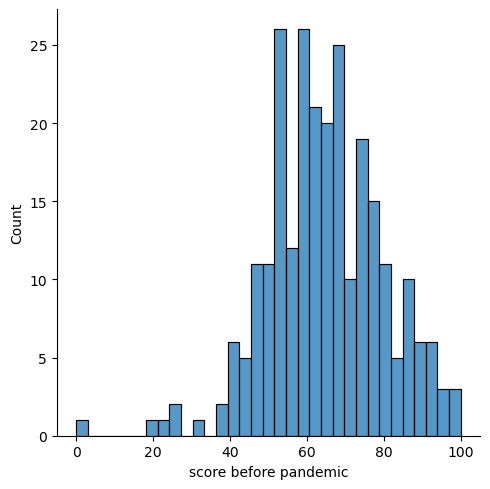

In [31]:
sns.displot(train_x, binwidth=3)

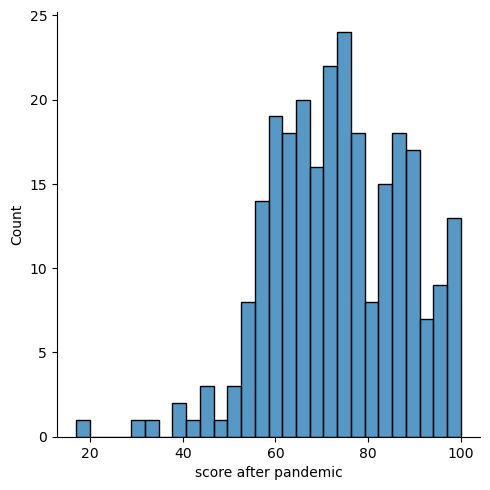

In [32]:
sns.displot(train_y, binwidth=3)

<Axes: xlabel='gender', ylabel='score before pandemic'>

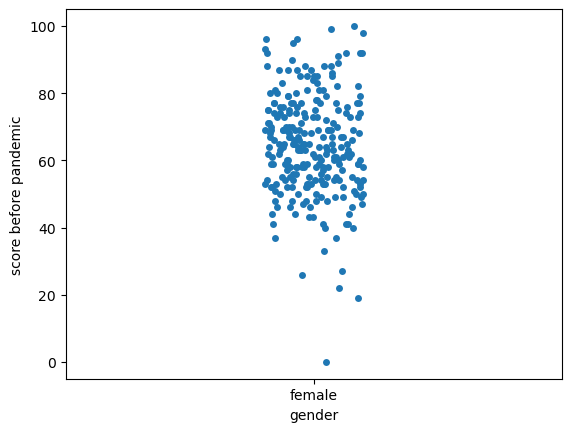

In [33]:
sns.stripplot(x='gender', y=train_x, data = df1)

<Axes: xlabel='gender', ylabel='score after pandemic'>

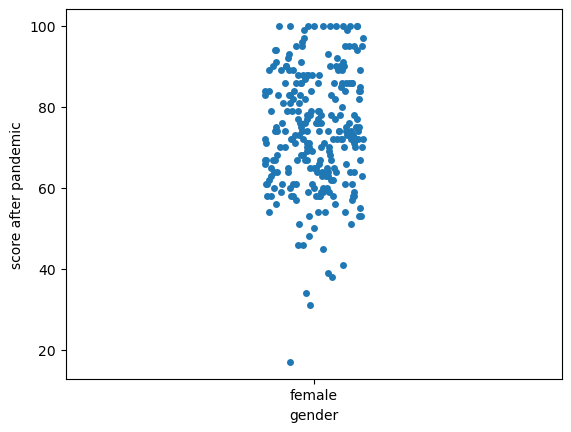

In [34]:
sns.stripplot(x='gender', y=train_y, data = df1)

In [35]:
trainxnp = (train_x.to_numpy()).reshape(-1, 1)
test_x = (test_x.to_numpy()).reshape(-1, 1)

In [36]:
trainynp = train_y.to_numpy()
test_y = test_y.to_numpy()

0.2 Part 2 Linear Model Development and Assessment

In [37]:
lin_model = LinearRegression().fit( trainxnp, trainynp)

In [38]:
m = lin_model.coef_[0]
b1 = lin_model.intercept_
print('m param (Coefficient): ', m)
print('b param (y-Intercept): ', b1)

m param (Coefficient):  0.8824566758097488
b param (y-Intercept):  16.759153992295843


In [42]:
def linmodel (x, m = 0.8824566758097488, b = 16.759153992295843):
    return m*x + b

In [43]:
score_linspace1 = np.linspace(min(trainxnp), max(trainxnp), 500)
lin_model_predictions = linmodel(score_linspace1)

(0.0, 102.0)

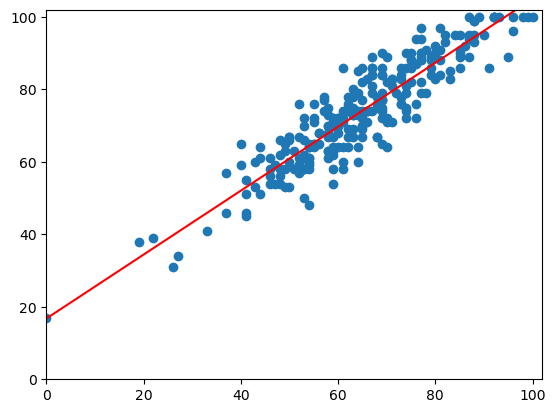

In [44]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace1, lin_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([0,102])

In [48]:
m = 0.8824566758097488
b = 16.759153992295843
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = m*test_x[i] + b
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

37.68420080719821


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\975869965.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


0.3 Part 3 Quad Model Development and Assessment

In [45]:
trainxnp_squared = trainxnp ** 2
trainxquad = np.hstack((trainxnp,trainxnp_squared))

In [46]:
quad_model = LinearRegression().fit( trainxquad, trainynp )

In [49]:
m = quad_model.coef_
y_intercept = quad_model.intercept_
print('"a" parameter: ', m[1])
print('"b" parameter: ', m[0])
print('"c" parameter: ', y_intercept)

"a" parameter:  -0.0006345231512138772
"b" parameter:  0.9615603204406948
"c" parameter:  14.439278610223027


In [50]:
def quadmodel (x, a = -0.0006345231512138772, b = 0.9615603204406948, c = 14.439278610223027):
    return a*x**2 + b*x + c

In [51]:
score_linspace2 = np.linspace(min(trainxnp), max(trainxnp), 500)
quad_model_predictions = quadmodel(score_linspace2)

(-2.0, 102.0)

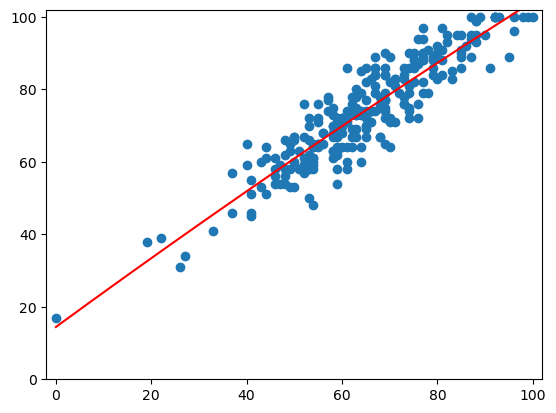

In [52]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace2, quad_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([-2,102])

In [54]:
a =-0.0006345231512138792
b = 0.9615603204406952
c = 14.43927861022302
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = a*(test_x[i])**2 + b*test_x[i] + c
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

37.49494134180416


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\258577054.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


WDS MALE LIN REGRESSION

0.1 Part 1 Data Visualization

In [55]:
df2 = df[df['gender'] == 'male']
print(df2)

    gender     tools  level of education mental health test mode  \
3     male    Tablet  associate's degree      stressed    online   
4     male    Mobile             college        normal    online   
7     male  Computer             college      stressed    online   
8     male    Laptop              school      stressed   offline   
10    male    Mobile  associate's degree        normal    online   
11    male    Laptop  associate's degree        normal    online   
13    male    Tablet             college        normal   offline   
16    male    Mobile              school        normal    online   
18    male    Mobile             college      stressed   offline   
20    male    Laptop              school        normal    online   
22    male    Laptop             college        normal    online   
24    male    Laptop   bachelor's degree      stressed   offline   
25    male    Tablet             college      stressed    online   
26    male  Computer             college        

In [56]:
df2.shape

(482, 8)

In [60]:
train_x,test_x, train_y,test_y= train_test_split(df2['score before pandemic'],df2['score after pandemic'],test_size=0.5,random_state= 1)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

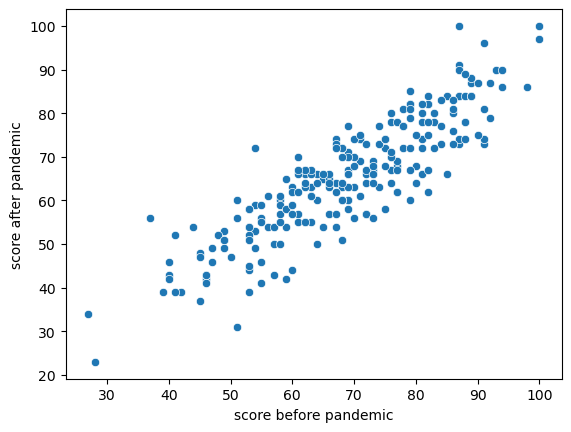

In [61]:
sns.scatterplot(x=train_x,y=train_y)

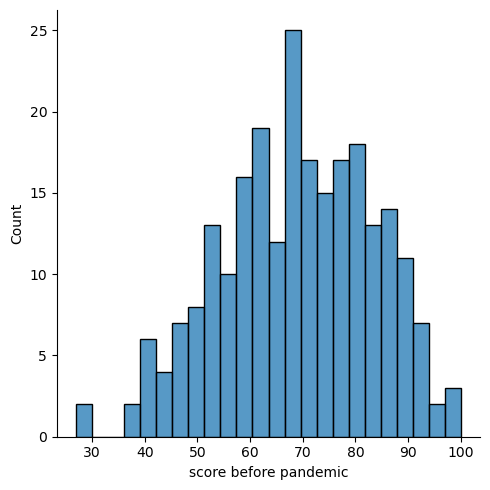

In [62]:
sns.displot(train_x,binwidth=3)

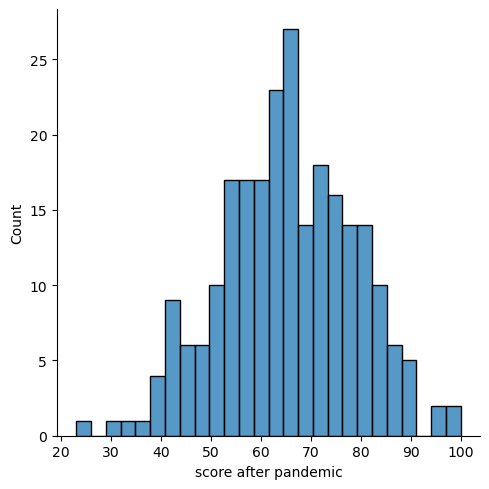

In [63]:
sns.displot(train_y, binwidth=3)

<Axes: xlabel='gender', ylabel='score before pandemic'>

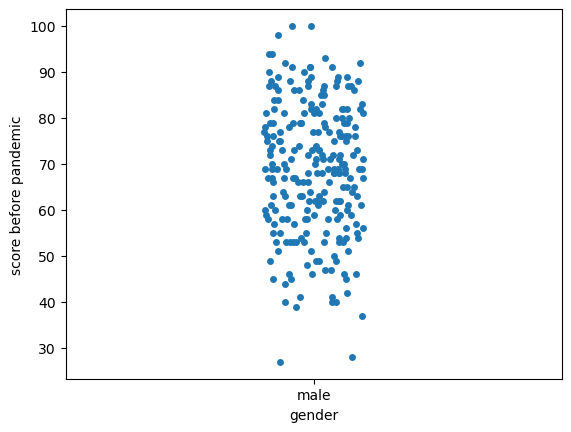

In [65]:
sns.stripplot(x='gender', y=train_x, data = df2)

<Axes: xlabel='gender', ylabel='score after pandemic'>

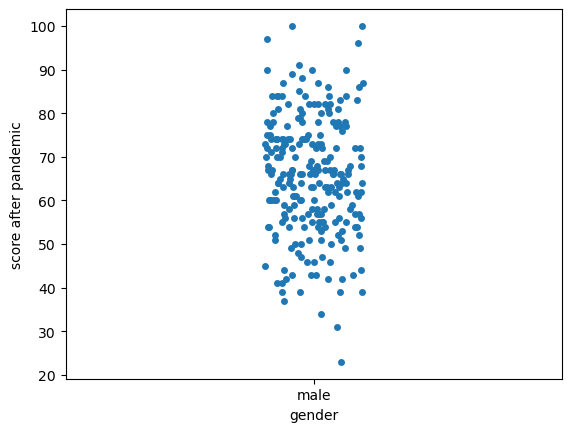

In [66]:
sns.stripplot(x='gender', y=train_y, data = df2)

0.2 Part 2 Linear Model Development and Assessment

In [68]:
trainxnp = (train_x.to_numpy()).reshape(-1, 1)
test_x = (test_x.to_numpy()).reshape(-1, 1)

In [69]:
trainynp = train_y.to_numpy()
test_y = test_y.to_numpy()

In [71]:
lin_model = LinearRegression().fit( trainxnp, trainynp)

In [72]:
m = lin_model.coef_[0]
b1 = lin_model.intercept_
print('m param (Coefficient): ', m)
print('b param (y-Intercept): ', b1)

m param (Coefficient):  0.8326158958085357
b param (y-Intercept):  8.162773641055928


In [73]:
def linmodel (x, m = 0.8326158958085357, b = 8.162773641055928):
    return m*x + b

In [74]:
score_linspace1 = np.linspace(min(trainxnp), max(trainxnp), 500)
lin_model_predictions = linmodel(score_linspace1)

(0.0, 102.0)

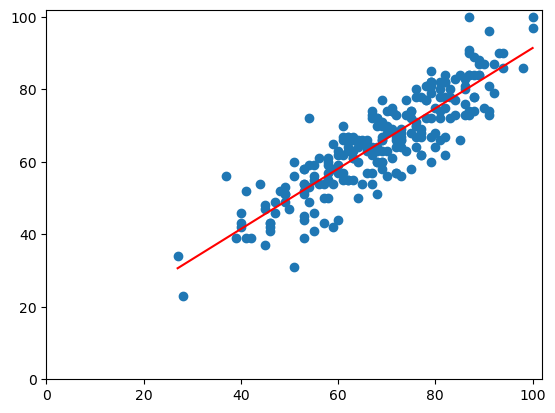

In [75]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace1, lin_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([0,102])

In [77]:
m = 0.8326158958085357
b = 8.162773641055928
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = m*test_x[i] + b
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

41.185123025803435


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\974160977.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


0.3 Part 3 Quad Model Development and Assessment

In [78]:
trainxnp_squared = trainxnp ** 2
trainxquad = np.hstack((trainxnp,trainxnp_squared))

In [79]:
quad_model = LinearRegression().fit( trainxquad, trainynp )

In [80]:
m = quad_model.coef_
y_intercept = quad_model.intercept_
print('"a" parameter: ', m[1])
print('"b" parameter: ', m[0])
print('"c" parameter: ', y_intercept)

"a" parameter:  0.0014768692524946016
"b" parameter:  0.6348004896066671
"c" parameter:  14.481929027897984


In [81]:
def quadmodel (x, a = 0.0014768692524946016, b = 0.6348004896066671, c = 14.481929027897984):
    return a*x**2 + b*x + c

In [82]:
score_linspace2 = np.linspace(min(trainxnp), max(trainxnp), 500)
quad_model_predictions = quadmodel(score_linspace2)

(-2.0, 102.0)

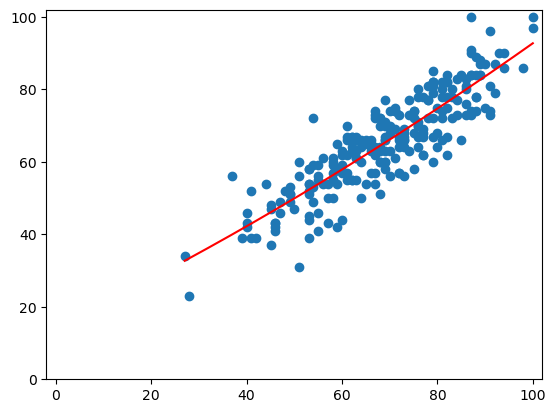

In [83]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace2, quad_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([-2,102])

In [84]:
a = 0.0014768692524946016
b = 0.6348004896066671
c = 14.481929027897984
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = a*(test_x[i])**2 + b*test_x[i] + c
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

41.59026373622257


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\3934475294.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


WDS NORMAL MENTAL HEALTH LINEAR REGRESSION

0.1 Part 1 Data Visualization

In [87]:
df3= df[df['mental health'] == 'normal']
print(df3)

     gender     tools  level of education mental health test mode  \
0    female  Computer   bachelor's degree        normal    online   
1    female    Mobile             college        normal   offline   
2    female  Computer             college        normal    online   
4      male    Mobile             college        normal    online   
5    female  Computer  associate's degree        normal    online   
6    female  Computer             college        normal   offline   
10     male    Mobile  associate's degree        normal    online   
11     male    Laptop  associate's degree        normal    online   
12   female  Computer              school        normal    online   
13     male    Tablet             college        normal   offline   
14   female    Tablet             college        normal    online   
15   female    Mobile         some school        normal    online   
16     male    Mobile              school        normal    online   
20     male    Laptop             

In [88]:
df3.shape

(645, 8)

In [90]:
train_x,test_x, train_y,test_y= train_test_split(df3['score before pandemic'],df3['score after pandemic'],test_size=0.5,random_state= 1)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

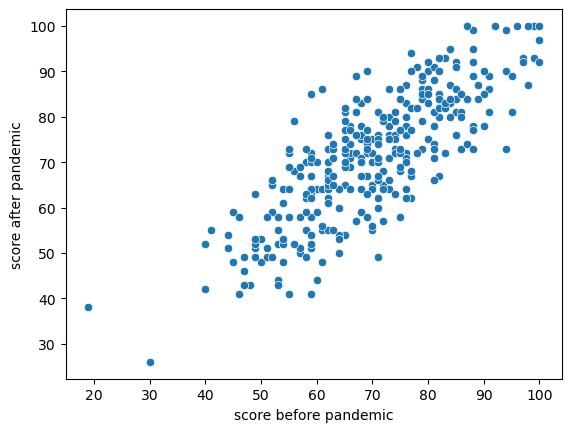

In [91]:
sns.scatterplot(x=train_x,y=train_y)

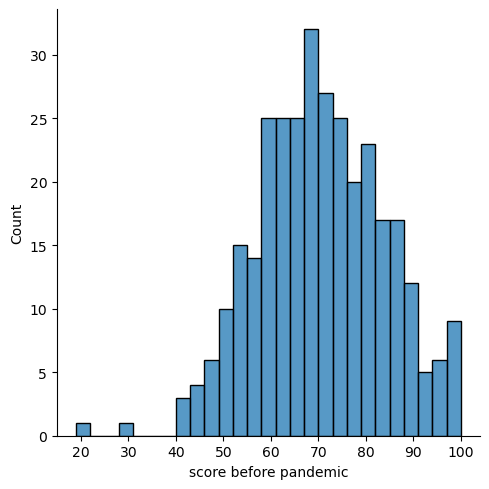

In [92]:
sns.displot(train_x,binwidth=3)

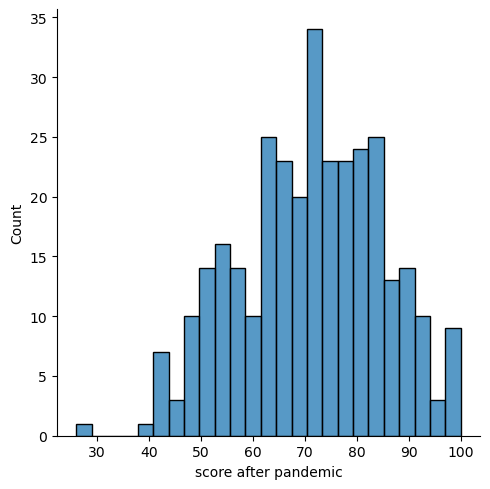

In [93]:
sns.displot(train_y,binwidth=3)

<Axes: xlabel='mental health', ylabel='score before pandemic'>

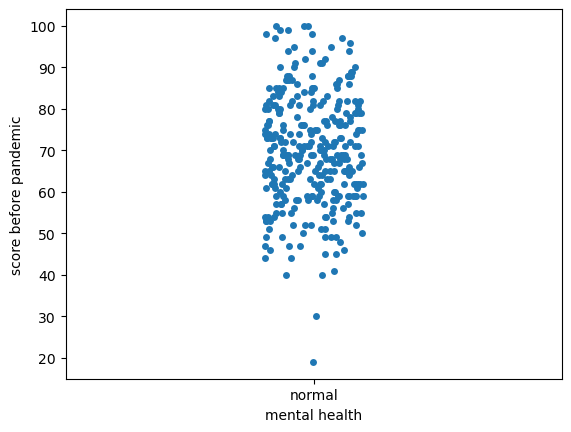

In [95]:
sns.stripplot(x='mental health', y=train_x, data = df3)

<Axes: xlabel='mental health', ylabel='score after pandemic'>

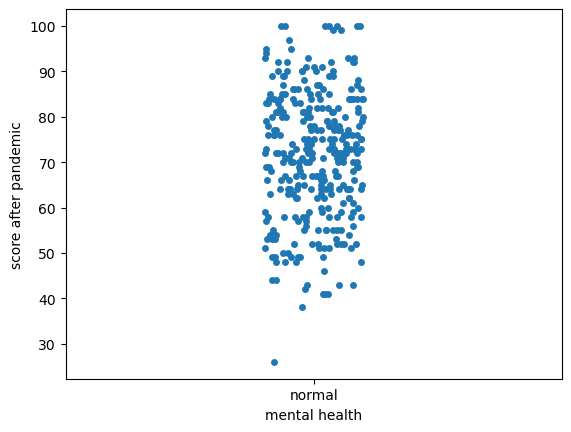

In [97]:
sns.stripplot(x='mental health', y=train_y, data = df3)

0.2 Part 2 Linear Model Development and Assessment

In [98]:
trainxnp = (train_x.to_numpy()).reshape(-1, 1)
test_x = (test_x.to_numpy()).reshape(-1, 1)

In [99]:
trainynp = train_y.to_numpy()
test_y = test_y.to_numpy()

In [100]:
lin_model = LinearRegression().fit( trainxnp, trainynp)

In [101]:
m = lin_model.coef_[0]
b1 = lin_model.intercept_
print('m param (Coefficient): ', m)
print('b param (y-Intercept): ', b1)

m param (Coefficient):  0.8314300692064002
b param (y-Intercept):  13.165236835579599


In [103]:
def linmodel (x, m = 0.8314300692064002, b = 13.165236835579599):
    return m*x + b

In [104]:
 score_linspace1 = np.linspace(min(trainxnp), max(trainxnp), 500)
 lin_model_predictions = linmodel(score_linspace1)

(-1.0, 102.0)

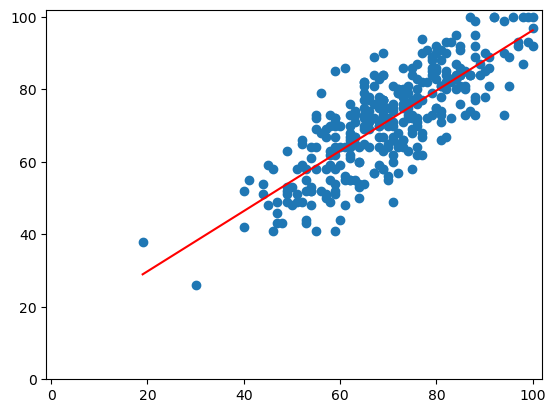

In [105]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace1, lin_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([-1,102])

In [106]:
m = 0.8314300692064002
b = 13.165236835579599
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = m*test_x[i] + b
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

68.88195193930945


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\2063250639.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


0.3 Part 3 Quad Model Development and Assessment

In [107]:
trainxnp_squared = trainxnp ** 2
trainxquad = np.hstack((trainxnp,trainxnp_squared))

In [108]:
quad_model = LinearRegression().fit( trainxquad, trainynp )

In [109]:
m = quad_model.coef_
y_intercept = quad_model.intercept_
print('"a" parameter: ', m[1])
print('"b" parameter: ', m[0])
print('"c" parameter: ', y_intercept)

"a" parameter:  -0.0008095166891465177
"b" parameter:  0.9434643891710022
"c" parameter:  9.434117172627097


In [110]:
def quadmodel (x, a = -0.0008095166891465177, b = 0.9434643891710022, c = 9.434117172627097):
    return a*x**2 + b*x + c

In [111]:
score_linspace2 = np.linspace(min(trainxnp), max(trainxnp), 500)
quad_model_predictions = quadmodel(score_linspace2)

(-1.0, 102.0)

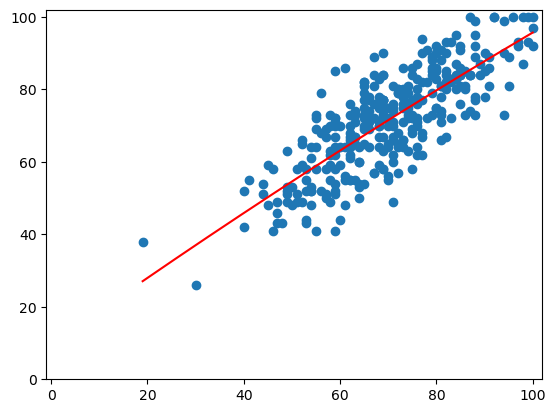

In [112]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace2, quad_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([-1,102])

In [114]:
a = -0.0008095166891465177
b = 0.9434643891710022
c = 9.434117172627097
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = a*(test_x[i])**2 + b*test_x[i] + c
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

68.88605115702399


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\2486547074.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


WDS STRESS LINEAR REGRESSION

0.1 Part 1 Data Visualization

In [116]:
df4 = df[df['mental health'] == 'stressed']
print(df4)

     gender     tools  level of education mental health test mode  \
3      male    Tablet  associate's degree      stressed    online   
7      male  Computer             college      stressed    online   
8      male    Laptop              school      stressed   offline   
9    female  Computer              school      stressed    online   
17   female  Computer         some school      stressed    online   
18     male    Mobile             college      stressed   offline   
19   female    Mobile  associate's degree      stressed    online   
21   female  Computer             college      stressed   offline   
24     male    Laptop   bachelor's degree      stressed   offline   
25     male    Tablet             college      stressed    online   
32   female    Mobile             college      stressed    online   
37   female    Laptop         some school      stressed    online   
38   female    Laptop  associate's degree      stressed   offline   
39     male  Computer  associate's

In [117]:
df4.shape

(355, 8)

In [118]:
train_x,test_x, train_y,test_y= train_test_split(df4['score before pandemic'],df4['score after pandemic'],test_size=0.5,random_state= 1)

<Axes: xlabel='score before pandemic', ylabel='score after pandemic'>

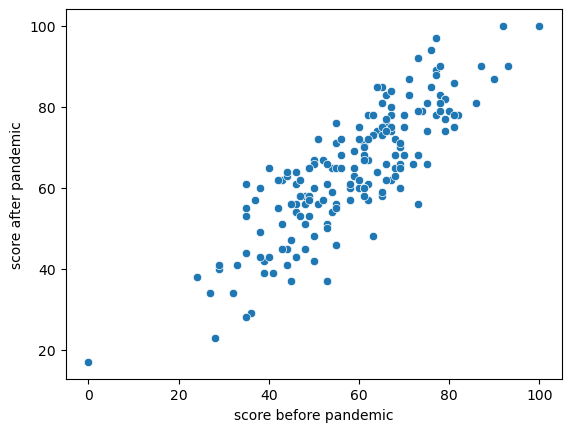

In [119]:
sns.scatterplot(x=train_x,y=train_y)

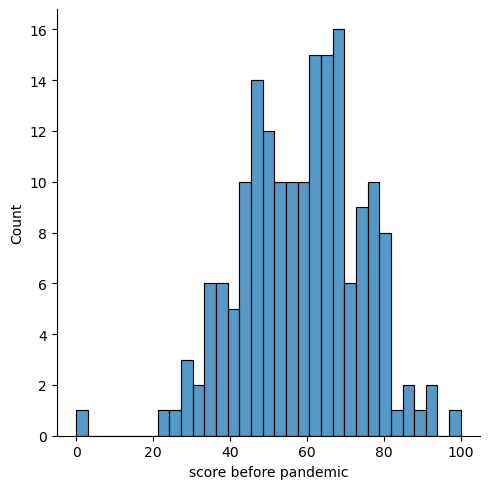

In [120]:
sns.displot(train_x,binwidth=3)

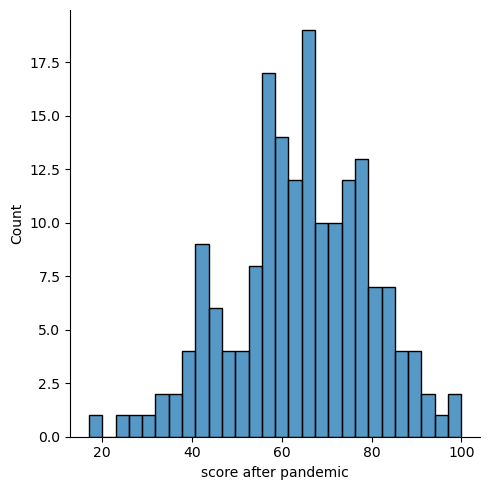

In [121]:
sns.displot(train_y,binwidth=3)

<Axes: xlabel='mental health', ylabel='score before pandemic'>

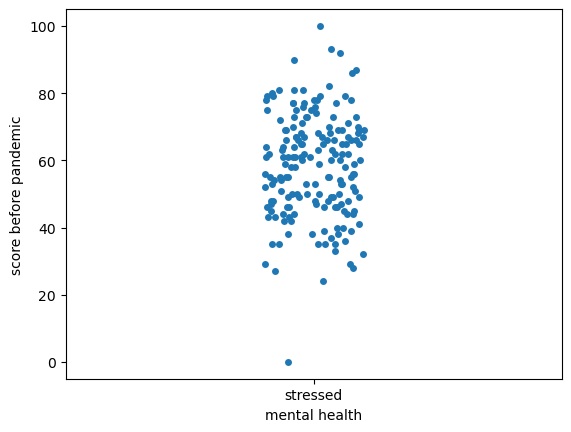

In [123]:
sns.stripplot(x='mental health', y=train_x, data = df4)

<Axes: xlabel='mental health', ylabel='score after pandemic'>

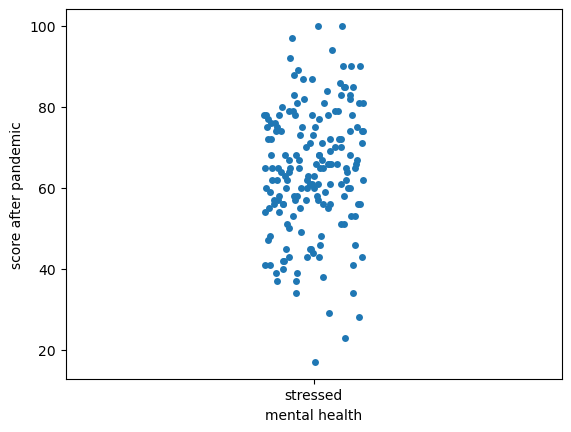

In [124]:
sns.stripplot(x='mental health', y=train_y, data = df4)

0.2 Part 2 Linear Model Development and Assessment

In [125]:
trainxnp = (train_x.to_numpy()).reshape(-1, 1)
test_x = (test_x.to_numpy()).reshape(-1, 1)

In [126]:
trainynp = train_y.to_numpy()
test_y = test_y.to_numpy()

In [127]:
lin_model = LinearRegression().fit( trainxnp, trainynp)

In [128]:
m = lin_model.coef_[0]
b1 = lin_model.intercept_
print('m param (Coefficient): ', m)
print('b param (y-Intercept): ', b1)

m param (Coefficient):  0.8431396155842698
b param (y-Intercept):  14.878337817544654


In [129]:
def linmodel (x, m = 0.8431396155842698, b = 14.878337817544654):
    return m*x + b

In [130]:
score_linspace1 = np.linspace(min(trainxnp), max(trainxnp), 500)
lin_model_predictions = linmodel(score_linspace1)

(-1.0, 102.0)

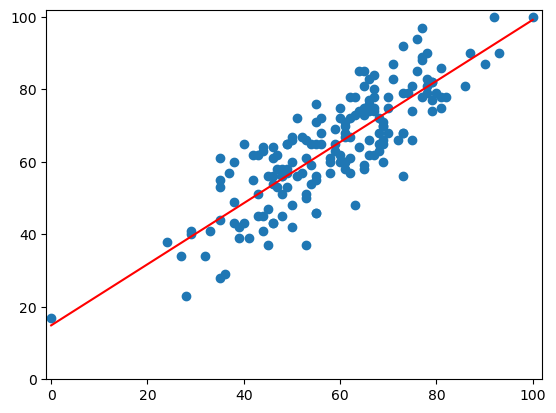

In [131]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace1, lin_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([-1,102])

In [132]:
m = 0.8431396155842698
b = 14.878337817544654
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = m*test_x[i] + b
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

71.98135864338384


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\244123929.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2


0.3 Part 3 Quad Model Development and Assessment

In [133]:
trainxnp_squared = trainxnp ** 2
trainxquad = np.hstack((trainxnp,trainxnp_squared))

In [134]:
quad_model = LinearRegression().fit( trainxquad, trainynp )

In [135]:
m = quad_model.coef_
y_intercept = quad_model.intercept_
print('"a" parameter: ', m[1])
print('"b" parameter: ', m[0])
print('"c" parameter: ', y_intercept)

"a" parameter:  -0.0001302084164464907
"b" parameter:  0.8578921510070154
"c" parameter:  14.491666714609778


In [136]:
def quadmodel (x, a = -0.0001302084164464907, b = 0.8578921510070154, c = 14.491666714609778):
    return a*x**2 + b*x + c

In [137]:
score_linspace2 = np.linspace(min(trainxnp), max(trainxnp), 500)
quad_model_predictions = quadmodel(score_linspace2)

(-1.0, 102.0)

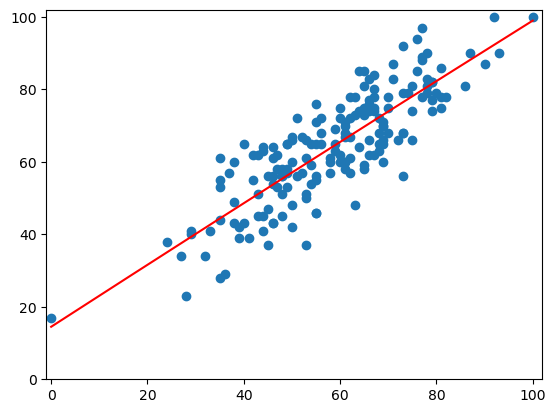

In [138]:
plt.scatter(trainxnp, trainynp)
plt.plot(score_linspace2, quad_model_predictions, c = 'r')
plt.ylim([0,102])
plt.xlim([-1,102])

In [139]:
a = -0.0001302084164464907
b = 0.8578921510070154
c = 14.491666714609778
lxtest = len(test_x)
MSEs = np.zeros( (lxtest))
for i in range(lxtest):
    ymodel = a*(test_x[i])**2 + b*test_x[i] + c
    MSEs[i] = (ymodel- test_y[i])**2
MSE_model = np.mean(MSEs)
print(MSE_model)

71.94430030410908


C:\Users\ymael\AppData\Local\Temp\ipykernel_31092\1838796040.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSEs[i] = (ymodel- test_y[i])**2
